<a href="https://colab.research.google.com/github/Jack-The-Ripper-1820/GAN_VAE/blob/main/MNIST_GAN_VAE_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPORT 1

Generative Adversarial Networks (GANs) are a class of machine learning models designed for generative tasks, such as generating new, synthetic data instances. The main idea behind GANs is to train two neural networks, a generator network and a discriminator network, in a two-player game framework. The generator network aims to generate new, synthetic data instances that are indistinguishable from real data, while the discriminator network aims to distinguish between real data instances and synthetic data instances generated by the generator network.

This code is an implementation of a GAN that generates new, synthetic images of handwritten digits from the MNIST dataset. The generator network is defined using the Keras library, with the TensorFlow backend. The generator network is a sequential model that consists of several dense and convolutional layers. The dense layers are used to learn a compact representation of the noise data, which is then upscaled to generate the synthetic images. The discriminator network is also defined using the Keras library, with the TensorFlow backend. The discriminator network is a convolutional neural network (CNN) that is designed to distinguish between real images and synthetic images.


The MNIST dataset is loaded, and the training images are preprocessed by reshaping them into 28x28x1 arrays and normalizing the pixel values to the range [-1, 1]. The generator and discriminator networks are then trained using the Adam optimization algorithm. The generator network is trained to generate synthetic images that can fool the discriminator network, while the discriminator network is trained to correctly identify real and synthetic images. The loss functions used to train the networks are binary cross-entropy loss functions, which measure the dissimilarity between the predicted probabilities and the true labels.


The code contains a for loop that trains a Generative Adversarial Network (GAN) by alternating between training the generator and discriminator. The generator and discriminator are defined as TensorFlow models and the generator loss and discriminator loss functions are defined outside of the loop.
Inside the loop, the training process occurs in two parts: first, the discriminator is trained on a batch of real images and a batch of fake images generated by the generator. The loss for the discriminator is calculated as the sum of the log loss for the real images and the log loss for the fake images. The gradients of the discriminator with respect to the loss are computed using the TensorFlow GradientTape context and the discriminator's trainable variables are updated using the Adam optimizer.


Next, the generator is trained by passing noise to it and the loss is calculated based on the discriminator's predictions on the generated images. The gradients of the generator with respect to the loss are computed using the TensorFlow GradientTape context and the generator's trainable variables are updated using the Adam optimizer.

tf.GradientTape is a TensorFlow mechanism that allows you to record the operations performed during forward pass and automatically compute the gradients in the backward pass. In this code, tf.GradientTape is used to calculate the gradients of the loss functions with respect to the trainable variables of the discriminator and generator models, so that these gradients can be used to update the weights of the models during training.


Here, there are two separate instances of tf.GradientTape: one for training the discriminator, and another for training the generator. In each case, the with tf.GradientTape() block is used to record the forward pass operations, and the gradients are then calculated using tape.gradient(loss, variables), where loss is the output of the loss function and variables are the trainable variables of the model. The resulting gradients are then passed to the optimizer using optimizer.apply_gradients(zip(grads, variables)).

Finally, the code prints the loss values every 10 epochs, saves the model weights every 20 epochs, and generates and plots fake images every 30 epochs.

This implementation demonstrates the power of GANs in generating new, synthetic data instances, and highlights the importance of using appropriate loss functions and optimization algorithms for training GANs. It can be used as a starting point for further research and development of GANs for a variety of generative tasks, including image generation, audio generation, and text generation.


## Loss Function in Generative Adversarial Networks (GANs)
The loss function in GANs plays a crucial role in determining the quality of the generated images. It is a measure of how well the generator and discriminator are performing in their respective roles.
The loss function in GANs consists of two parts: the generator loss and the discriminator loss. The generator loss measures the difference between the generated images and the ground truth images, while the discriminator loss measures the ability of the discriminator to correctly classify the generated images and the real images.

The generator loss is calculated using the cross-entropy loss function, as follows:

### L_G = -E[log(D(G(z)))]

where G(z) is the generated image, 

D is the discriminator, and 

z is the random noise vector. 

The goal of the generator is to maximize this loss, which means it wants to produce images that the discriminator can't distinguish from the real images.


The discriminator loss is calculated using the cross-entropy loss function as well, as follows:


### L_D = -E[log(D(x))] - E[log(1 - D(G(z)))]

where x is the real image and G(z) is the generated image. 

The goal of the discriminator is to minimize this loss, which means it wants to correctly classify the real and generated images.
In summary, the loss function in GANs plays a crucial role in the training process, as it determines the quality of the generated images and the ability of the discriminator to correctly classify the generated and real images.

This leads to a minmax Loss function between the generator and the discriminator

The Minimax loss function is a crucial component in the training of GANs. It is used to train the generator and discriminator networks in a GAN architecture. The loss function can be seen as a two-player game between the generator and the discriminator, where the generator is trying to generate samples that the discriminator cannot differentiate from real samples, and the discriminator is trying to distinguish real samples from generated ones.

In the game, the generator tries to minimize the loss function, while the discriminator tries to maximize it. The loss function can be written as a min-max optimization problem, where the generator is trying to minimize its negative expected reward, and the discriminator is trying to maximize its expected reward. The expected reward is defined as the probability that the discriminator correctly classifies a sample as either real or generated.

The Minimax loss function can be written as:

### L(G,D) = E_x[log(D(x))] + E_z[log(1-D(G(z)))]

where G is the generator, D is the discriminator, x is a real sample from the dataset, and z is a random noise vector that is used as input to the generator. The first term in the loss function is the expected log-likelihood that the discriminator assigns a high probability to real samples, and the second term is the expected log-likelihood that the discriminator assigns a low probability to generated samples.

By alternating the optimization of the generator and the discriminator, the Minimax loss function trains the two networks to play a minimax game, where the generator tries to produce samples that the discriminator cannot distinguish from real samples, and the discriminator tries to classify samples as accurately as possible. Over time, the generator and discriminator improve, and the generated samples become increasingly realistic.

For this model that was implemented in this part : 

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 64)       204800    
 ranspose)                                                       
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        1600      
 ranspose)                                                       
                                                                 
=================================================================
Total params: 2,330,944
Trainable params: 2,305,472
Non-trainable params: 25,472
_________________________________________________________________
Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         819456    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 4, 4, 256)         0         
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 512)         3277312   
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 2, 2, 512)         0         
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
=================================================================
Total params: 4,305,409
Trainable params: 4,305,409
Non-trainable params: 0
_________________________________________________________________


The avergae prediction of this part,

Average prediction: -1.2459755
### The goal is to optimize the average prediction of the discriminator to 0.5

## To be implemented 

### Variational Autoencoder (VAE) on MNIST (To be implemented by part 2) 
### GAN and VAE on Face Images (To be implemented by part 3)

A Variational Autoencoder (VAE) is a generative model that learns a compact representation of the data by encoding it into a lower-dimensional space. The decoder network then generates the data samples from this lower-dimensional representation.

In the context of MNIST, the VAE model will learn to encode the handwritten digit images into a lower-dimensional space and then generate new images that are similar to the original images.

Implementation of VAE on MNIST is going to be performed shortly, and the results will be compared with the GAN model on MNIST. This comparison will provide insights into the strengths and weaknesses of VAEs and GANs, and help us understand which model is better suited for generating MNIST images.

Later, the plan is to extend the implementation to face images. This extension will help us understand how well VAEs and GANs perform on more complex and high-dimensional data, such as face images. By doing so, we hope to provide a comprehensive analysis of the performance of VAEs and GANs on different types of data.



In [1]:
import tensorflow as tf
import os
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Input, Dense, Lambda, Reshape, Conv2DTranspose, Flatten
from keras.models import Model
from keras.losses import BinaryCrossentropy

In [2]:
# Define the generator network

def make_generator_model():
    latent_dim = 100
    model = keras.Sequential(name = 'Generator')
    model.add(layers.Dense(7 * 7 * 256, use_bias = False, input_shape = (latent_dim, )))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
      
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias = False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias = False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias = False))
    # assert model.output_shape == (None, 28, 28, 32)
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides = (2, 2), padding = 'same', use_bias = False, activation = 'tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [3]:
# Define the discriminator network
def make_discriminator_model():
    model = keras.Sequential(name = 'Discriminator')
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [4]:
# Define the loss functions
cross_entropy = BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [5]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_train = (x_train - 127.5) / 127.5

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
#Create the generator and discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

generator.summary()
discriminator.summary()
#Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#Define a checkpoint to save the model weights
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
discriminator_optimizer=discriminator_optimizer, generator=generator, discriminator=discriminator)

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        51

Epoch:  0
Discriminator loss:  tf.Tensor(0.88648057, shape=(), dtype=float32)
Generator loss:  tf.Tensor(2.086899, shape=(), dtype=float32)


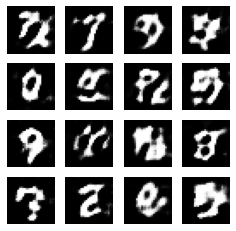

Epoch:  10
Discriminator loss:  tf.Tensor(0.8726599, shape=(), dtype=float32)
Generator loss:  tf.Tensor(1.1184665, shape=(), dtype=float32)
Epoch:  20
Discriminator loss:  tf.Tensor(0.8988785, shape=(), dtype=float32)
Generator loss:  tf.Tensor(1.5193901, shape=(), dtype=float32)
Epoch:  30
Discriminator loss:  tf.Tensor(0.90930516, shape=(), dtype=float32)
Generator loss:  tf.Tensor(1.8611614, shape=(), dtype=float32)


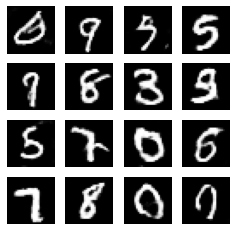

Epoch:  40
Discriminator loss:  tf.Tensor(0.88129723, shape=(), dtype=float32)
Generator loss:  tf.Tensor(1.4147544, shape=(), dtype=float32)
Epoch:  50
Discriminator loss:  tf.Tensor(1.1697485, shape=(), dtype=float32)
Generator loss:  tf.Tensor(1.5080811, shape=(), dtype=float32)


In [8]:
#Train the GAN
EPOCHS = 60
noise_dim = 100
num_examples_to_generate = 16
BATCH_SIZE = 32 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

for epoch in range(EPOCHS):
  for i in range(len(x_train) // BATCH_SIZE):
    # Get a batch of real images
    start = i * BATCH_SIZE
    end = (i + 1) * BATCH_SIZE
    real_images = x_train[start:end]
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    # Generate a batch of fake images
    fake_images = generator(noise, training=True)
    # print(fake_images[0].shape)
    # Train the discriminator
    with tf.GradientTape() as disc_tape:
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)
        disc_loss = discriminator_loss(real_output, fake_output)
    grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as gen_tape:
        noise = tf.random.normal([BATCH_SIZE, noise_dim])
        fake_images = generator(noise, training=True)
        fake_output = discriminator(fake_images, training=True)
        gen_loss = generator_loss(fake_output)
    grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(grads, generator.trainable_variables))

  # Print the loss values for every 10 epochs
  if epoch % 10 == 0:
      print("Epoch: ", epoch)
      print("Discriminator loss: ", disc_loss)
      print("Generator loss: ", gen_loss)
  # Save the model weights every 20 epochs
  if epoch % 20 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

  # Generate and plot some fake images every 30 epochs
  if epoch % 30 == 0:
      fake_images = generator(seed, training=False)
      plt.figure(figsize=(4, 4))
      for i in range(num_examples_to_generate):
          plt.subplot(4, 4, i + 1)
          plt.imshow(tf.reshape(fake_images[i], (28, 28)), cmap='gray')
          plt.axis('off')
      plt.show()


In [9]:
#Saving the model
from google.colab import drive
drive.mount('/content/gdrive')
generator.save('/content/gdrive/My Drive/generator_MNIST.h5')
discriminator.save('/content/gdrive/My Drive/discriminator_MNIST.h5')

Mounted at /content/gdrive


Average prediction: -1.2459755


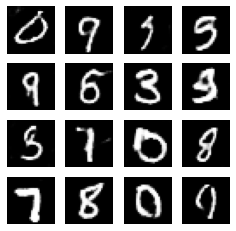

In [12]:
fake_images = generator(seed, training=False)
predictions = discriminator(fake_images, training = False)
average_prediction = tf.reduce_mean(predictions)
print("Average prediction:", average_prediction.numpy())
plt.figure(figsize=(4, 4))

for i in range(num_examples_to_generate):
  plt.subplot(4, 4, i + 1)
  plt.imshow(tf.reshape(fake_images[i], (28, 28)), cmap='gray')
  plt.axis('off')
plt.show()